### Automated Kruskal-Newton Diagrams
___

A possible project for me to do in my free time would be to automate the process of creating Kruskal-Newton diagrams for differential equations with a small parameter.

Idea: 
1. Input equations in the form of strings.
2. Parse the strings and return the corresponding point on the KN diagram for each term
3. Collect the x-values from all points into an array, likewise for the y-values
4. Pass the arrays to Plots.jl for plotting
5. *Somehow handle the process of drawing the support lines.* -> deal with this later.
6. Return the plot for display.

For now let's imagine a simple K-N diagram where the equations are homogeneous (RHS = 0).

Rules for creating points (step 2):
1. for each term in the equation (for each substring parsed from the original), an instance of "dx()" makes the x-coordinate go DOWN by 1. If "dx(dx())" appears, the x-coordinate goes DOWN by 2. 
2. Likewise, an instance of "ϵ" makes the y-coordinate go UP by 1. 
3. Otherwise, return (0,0) as the point.

In [69]:
using Plots

In [70]:
function parse_equation(equation::String)
    # Split the string on '+', '-', or '=' and remove the operators
    terms = split(equation, r"[+=-]")
    
    # Trim whitespace from each term and filter out empty terms
    cleaned_terms = filter(!isempty, map(strip, terms))
    
    # Return the cleaned terms and their count
    return length(cleaned_terms), cleaned_terms
end

parse_equation (generic function with 1 method)

In [71]:
function calculate_coordinates(terms)
    coordinates = []

    for term in terms
        x, y = 0, 0  # Start with (0, 0) for each term
        
        # Use regular expressions to count all occurrences of "dx" (including nested ones)
        dx_count = length(collect(eachmatch(r"dx", term)))  # Find all matches of "dx"
        x -= dx_count  # Decrement x by the number of dx occurrences
        
        # Count occurrences of "ϵ" (epsilon) in the term
        y += length(collect(eachmatch(r"ϵ", term)))  # Every "ϵ" increments y
        
        # Store the final coordinate for this term
        push!(coordinates, (x, y))
    end

    return coordinates
end


calculate_coordinates (generic function with 1 method)

In [72]:
function parse_and_calculate(equation::String)
    # Parse the equation into terms
    terms = split(equation, r"[+=-]")
    cleaned_terms = filter(!isempty, map(strip, terms))

    # Calculate coordinates for each term
    coordinates = calculate_coordinates(cleaned_terms)

    return cleaned_terms, coordinates
end

parse_and_calculate (generic function with 1 method)

In [73]:
function remove_duplicates_and_collect(coordinates)
    # Remove duplicates by converting to a Set and back to an Array
    unique_coordinates = collect(Set(coordinates))
    
    # Collect x-coordinates and y-coordinates into separate arrays
    xarray = [coord[1] for coord in unique_coordinates]
    yarray = [coord[2] for coord in unique_coordinates]
    
    return xarray, yarray
end

remove_duplicates_and_collect (generic function with 1 method)

In [74]:
function plot_points(xarray::Vector{Int}, yarray::Vector{Int})
    theme(:default::Symbol)

    # Define the range for the plot based on the data
    xmin, xmax = extrema(xarray)
    ymin, ymax = extrema(yarray)

    # Extend the ranges slightly to fit arrows
    padding = 1
    xmin -= padding; xmax += padding
    ymin -= padding; ymax += padding

    # Add thicker axes at x=0 and y=0 with arrows
    plt = plot([xmin, xmax], [0, 0], lw=2, color=:black, arrow=:arrow, label="")  # x-axis
    plt = plot!([0, 0], [ymin, ymax], lw=2, color=:black, arrow=:arrow, label="")  # y-axis
    
    # Create the scatter plot
    plt = scatter!(
        xarray, yarray,
        xlabel = "p", ylabel = "q",
        title = "Kruskal-Newton Points",
        marker = (:circle, 8, :blue),
        legend = false,
        grid = false  # Disable default gridlines
    )

    # Add smaller gridlines at integer steps
    for x in xmin:xmax
        plt = plot!([x, x], [ymin, ymax], lw=0.5, color=:gray, label="")
    end
    for y in ymin:ymax
        plt = plot!([xmin, xmax], [y, y], lw=0.5, color=:gray, label="")
    end
    return plt
end

plot_points (generic function with 1 method)

In [75]:
# Example usage
equation = "ϵ*ϵ*dx(dx(u)) + ϵ*dx(u) + dx(u) = 0"
terms, coordinates = parse_and_calculate(equation);

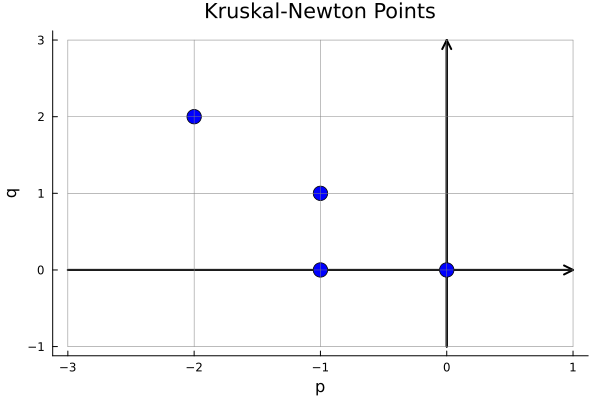

In [76]:
x, y = remove_duplicates_and_collect(coordinates)
KNdiagram = plot_points(x, y)